### Handwritten digits classification using CNN

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras import datasets,models,layers
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 105s 9us/step


In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

In [19]:
28*28

784

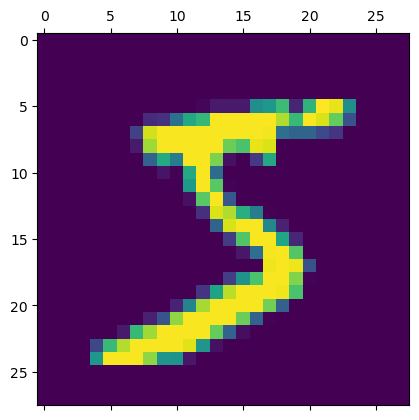

In [26]:
plt.matshow(X_train[0])

In [27]:
y_train[0]

5

In [28]:
# Normalization
X_train = X_train / 255
X_test = X_test / 255

In [31]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [40]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

######
28 and 28 represent the height and width of each image, respectively.

1 signifies that each image has a single channel (grayscale).

In [41]:
X_train.shape

(60000, 28, 28, 1)

In [44]:
CNN=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [45]:
CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
CNN.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1451 - accuracy: 0.9553
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0504 - accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0353 - accuracy: 0.9889
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0256 - accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0197 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0143 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0120 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0098 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0078 - accuracy: 0.9974
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [47]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0359 - accuracy: 0.9918


[0.03590071573853493, 0.9918000102043152]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

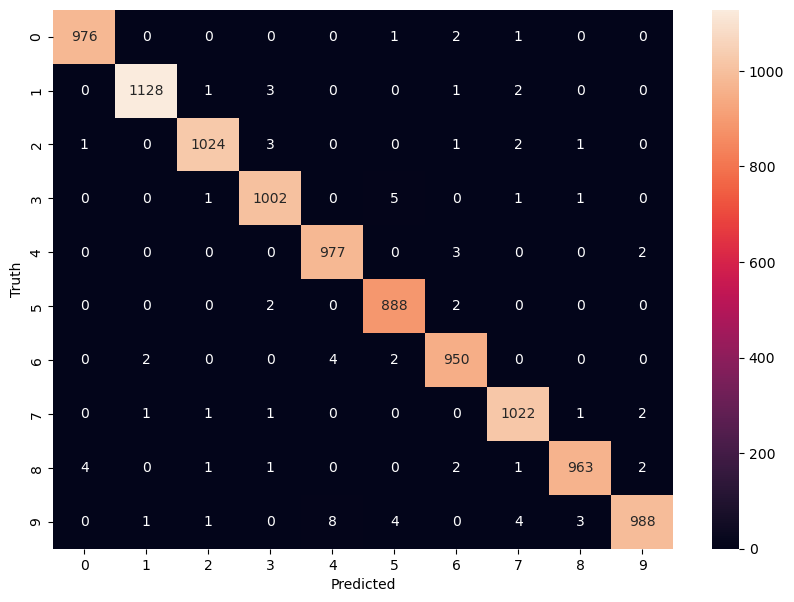

In [49]:
y_pred = CNN.predict(X_test)
y_pred_labels=[np.argmax(element) for element in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')